# Day 4 Take Home Assignment

Choose a Twitter user that you like or are interested in. If you don't want to choose one you can use Elon Musk's Twitter account for this exercise (@elonmusk). 

Collect the text of 20 tweets from this account and do the following with these tweets:

**Processing**

- use the "clean" function in the "preprocessor.api" package to do an initial cleaning.
- set all words in the tweets to lowercase.
- remove stop words and other punctuation.

**Tokenization**

- save all the tweets as a single string and tokenize the tweets. Report the length of the list containing the tokens.

**Statistics**

- Find the top 10 most frequent words in the tweets and report them.

In [5]:
pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=2b47b443bc3affedad616f2e3176db28b773a19309daf48656509230e2af010d
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [7]:
import tweepy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import stop_words
import json
import pprint as pp
from preprocessor.api import clean, tokenize, parse
import matplotlib.pyplot as plt

CONSUMER_KEY = # API Key
CONSUMER_SECRET = #API Secret Key
OAUTH_TOKEN = # Access Token
OAUTH_SECRET = # Access Token Secret

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_SECRET)

api = tweepy.API(auth)
api

In [8]:
tweets = api.user_timeline(screen_name='@elonmusk', count=20)
tweets[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jun 06 20:47:33 +0000 2020',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 29873662,
    'id_str': '29873662',
    'indices': [0, 6],
    'name': 'Marques Brownlee',
    'screen_name': 'MKBHD'}]},
 'favorite_count': 944,
 'favorited': False,
 'geo': None,
 'id': 1269370365651738624,
 'id_str': '1269370365651738624',
 'in_reply_to_screen_name': 'MKBHD',
 'in_reply_to_status_id': 1269366679282298881,
 'in_reply_to_status_id_str': '1269366679282298881',
 'in_reply_to_user_id': 29873662,
 'in_reply_to_user_id_str': '29873662',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 41,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': '@MKBHD Big line at the barbershop',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Tue Jun 02 20:12:29 +0000 2009',
  'defau

In [0]:
elontweets = []

for tweet in tweets:
  elontweets.append(tweet._json)

In [0]:
elontweet_text = []

for tweet in elontweets:
  elontweet_text.append(tweet['text'])

In [11]:
pp.pprint(elontweet_text)

['@MKBHD Big line at the barbershop',
 '@akidesir Thursday',
 '@CodingMark I guess more people need to get more involved in the party '
 'primaries (which is a chore)',
 'The gerontocracy is out of touch with the people',
 'Selling weed literally went from major felony to essential business (open '
 'during pandemic) in much of America &amp; yet… https://t.co/32J0z4qDTI',
 'This will probably get me into trouble, but I feel I have to say it',
 '@PPathole Good point haha',
 'Order a Tesla online in 2 mins at https://t.co/46TXqRrsdr',
 'Tesla Model Y review by Dan Neil https://t.co/3oS85UFaaR',
 '@NASASpaceflight Methalox is the right propellant. Should be staged '
 'combustion &amp; highly reusable.',
 '@Martian_Will @flcnhvy @Jbw29pitt @PPathole Yes',
 '@flcnhvy @Jbw29pitt @PPathole About a dozen transfer windows, so ~25 years',
 '@flcnhvy @SpaceX @NASA Wow, hard to believe that was 10 years ago!',
 '@cam5442 @FlatJannrickles @AlexBerenson @JeffBezos @jack @Twitter Jack is '
 'doing hi

In [0]:
elon_clean = [clean(x) for x in elontweet_text]

In [13]:
elon_clean

['Big line at the barbershop',
 'Thursday',
 'I guess more people need to get more involved in the party primaries (which is a chore)',
 'The gerontocracy is out of touch with the people',
 'Selling weed literally went from major felony to essential business (open during pandemic) in much of America &amp; yet',
 'This will probably get me into trouble, but I feel I have to say it',
 'Good point haha',
 'Order a Tesla online in mins at',
 'Tesla Model Y review by Dan Neil',
 'Methalox is the right propellant. Should be staged combustion &amp; highly reusable.',
 'Yes',
 'About a dozen transfer windows, so ~25 years',
 'Wow, hard to believe that was years ago!',
 'Jack is doing his best. I support him.',
 ': Falcon flew for the first time ten years ago today. Completing missions to date, Falcon is now the most flown operationa',
 'Time to break up Amazon. Monopolies are wrong!',
 'This is insane',
 'Thats when all life on Earth will be boiled off. What matters is how long civilization is

In [14]:
type(elon_clean)

list

In [15]:
elon_clean[0:5]

['Big line at the barbershop',
 'Thursday',
 'I guess more people need to get more involved in the party primaries (which is a chore)',
 'The gerontocracy is out of touch with the people',
 'Selling weed literally went from major felony to essential business (open during pandemic) in much of America &amp; yet']

In [16]:
elon_superclean = []

for tweet in elon_clean:
  if len(tweet)>0:
    elon_superclean.append(tweet.lower())
  
elon_superclean[0:5]

['big line at the barbershop',
 'thursday',
 'i guess more people need to get more involved in the party primaries (which is a chore)',
 'the gerontocracy is out of touch with the people',
 'selling weed literally went from major felony to essential business (open during pandemic) in much of america &amp; yet']

In [0]:
def list_to_string(s):
  str1 = " "
  return (str1.join(s))

In [18]:
elontweets_string = list_to_string(elon_superclean)
elontweets_string

'big line at the barbershop thursday i guess more people need to get more involved in the party primaries (which is a chore) the gerontocracy is out of touch with the people selling weed literally went from major felony to essential business (open during pandemic) in much of america &amp; yet this will probably get me into trouble, but i feel i have to say it good point haha order a tesla online in mins at tesla model y review by dan neil methalox is the right propellant. should be staged combustion &amp; highly reusable. yes about a dozen transfer windows, so ~25 years wow, hard to believe that was years ago! jack is doing his best. i support him. : falcon flew for the first time ten years ago today. completing missions to date, falcon is now the most flown operationa time to break up amazon. monopolies are wrong! this is insane thats when all life on earth will be boiled off. what matters is how long civilization is capable of mak so many war stories over eventful years! but starship

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
elontweets_tokenized = word_tokenize(elontweets_string)
elontweets_tokenized[0:10]

['big',
 'line',
 'at',
 'the',
 'barbershop',
 'thursday',
 'i',
 'guess',
 'more',
 'people']

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [0]:
elon_tokenized_clean = []

for word in elontweets_tokenized:
  if (word not in stop_words) and len(word)>2:
    elon_tokenized_clean.append(word)

In [0]:
elon_tweets_freq = FreqDist(elon_tokenized_clean)

In [27]:
pp.pprint(elon_tweets_freq.most_common(10))

[('years', 4),
 ('people', 2),
 ('get', 2),
 ('amp', 2),
 ('tesla', 2),
 ('ago', 2),
 ('falcon', 2),
 ('time', 2),
 ('life', 2),
 ('big', 1)]


In [28]:
len(elon_tokenized_clean)

108

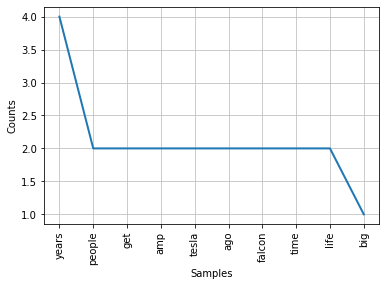

In [29]:
elon_tweets_freq.plot(10, cumulative=False)
plt.show()